In [204]:
import pandas as pd 
import numpy  as np 


In [205]:
df = pd.read_excel("Algoritma Apriori Chintya.xlsx")

C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID transaksi    150 non-null    object 
 1   Mie Yamin Asin  150 non-null    float64
 2   Lumpia          150 non-null    float64
 3   Ocha            150 non-null    float64
 4   Black Sun       150 non-null    float64
 5   Ginger Tea      150 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


In [207]:
df.isnull().sum()
df.head()


,ID transaksi,Mie Yamin Asin,Lumpia,Ocha,Black Sun,Ginger Tea
0,NaN,NaN,NaN,NaN,NaN,NaN
1,T1,1.0,1.0,0.0,0.0,0.0
2,T2,1.0,0.0,1.0,1.0,0.0
3,T3,1.0,1.0,0.0,0.0,1.0
4,T4,1.0,1.0,0.0,1.0,0.0


In [208]:
df.dropna()


,ID transaksi,Mie Yamin Asin,Lumpia,Ocha,Black Sun,Ginger Tea
1,T1,1.0,1.0,0.0,0.0,0.0
2,T2,1.0,0.0,1.0,1.0,0.0
3,T3,1.0,1.0,0.0,0.0,1.0
4,T4,1.0,1.0,0.0,1.0,0.0
5,T5,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
146,T146,0.0,1.0,1.0,1.0,0.0
147,T147,1.0,1.0,0.0,0.0,1.0
148,T148,0.0,1.0,1.0,1.0,0.0
149,T149,1.0,1.0,0.0,1.0,0.0


In [209]:
grouped_df = df.groupby('ID transaksi')[['Mie Yamin Asin', 'Lumpia', 'Ocha', 'Black Sun', 'Ginger Tea']].sum()

print(grouped_df)

              Mie Yamin Asin  Lumpia  Ocha  Black Sun  Ginger Tea
ID transaksi                                                     
T1                       1.0     1.0   0.0        0.0         0.0
T10                      1.0     1.0   1.0        0.0         0.0
T100                     1.0     1.0   0.0        0.0         1.0
T101                     1.0     0.0   1.0        1.0         0.0
T102                     0.0     1.0   0.0        0.0         1.0
...                      ...     ...   ...        ...         ...
T95                      1.0     1.0   1.0        1.0         0.0
T96                      1.0     0.0   1.0        0.0         1.0
T97                      1.0     1.0   0.0        0.0         0.0
T98                      0.0     1.0   1.0        1.0         0.0
T99                      1.0     0.0   1.0        0.0         1.0

[150 rows x 5 columns]


In [210]:

from mlxtend.frequent_patterns import apriori, association_rules
from tabulate import tabulate

# Menghitung itemsets yang sering muncul
frequent_itemsets = apriori(grouped_df, min_support=0.2, use_colnames=True)

# Menampilkan hasil frequent itemsets dalam bentuk tabel
print("Frequent Itemsets:")
print(tabulate(frequent_itemsets, headers='keys', tablefmt='pretty', showindex=False))

# Menghitung aturan asosiasi
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

print("\nAssociation Rules:")
print(tabulate(rules, headers='keys', tablefmt='pretty', showindex=False))

Frequent Itemsets:
+---------------------+-------------------------------------------------------+
|       support       |                       itemsets                        |
+---------------------+-------------------------------------------------------+
|        0.74         |             frozenset({'Mie Yamin Asin'})             |
|        0.58         |                 frozenset({'Lumpia'})                 |
| 0.4666666666666667  |                  frozenset({'Ocha'})                  |
| 0.5466666666666666  |               frozenset({'Black Sun'})                |
| 0.5666666666666667  |               frozenset({'Ginger Tea'})               |
| 0.44666666666666666 |        frozenset({'Lumpia', 'Mie Yamin Asin'})        |
| 0.32666666666666666 |         frozenset({'Ocha', 'Mie Yamin Asin'})         |
| 0.36666666666666664 |      frozenset({'Black Sun', 'Mie Yamin Asin'})       |
| 0.3933333333333333  |      frozenset({'Mie Yamin Asin', 'Ginger Tea'})      |
| 0.21333333333333335

C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [211]:


# Menghitung itemsets yang sering muncul
frequent_itemsets = apriori(grouped_df, min_support=0.2, use_colnames=True)

# Menghitung aturan asosiasi
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Memilih kolom yang diinginkan
selected_columns = rules[['antecedents', 'consequents', 'antecedent support', 'consequent support', 'support', 'confidence', 'lift']]

# Menampilkan hasil aturan asosiasi dengan styling
styled_rules = selected_columns.style.set_table_attributes('style="border-collapse: collapse; width: 100%;"') \
    .set_table_styles([{'selector': 'th', 'props': [('background-color', '#2196F3'), ('color', 'white'), ('border', '1px solid black')]},
                       {'selector': 'td', 'props': [('border', '1px solid black')]}]) \
    .set_properties(**{'padding': '10px', 'text-align': 'center'})

# Menampilkan hasil
styled_rules

C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,frozenset({'Lumpia'}),frozenset({'Mie Yamin Asin'}),0.580000,0.740000,0.446667,0.770115,1.040696
1,frozenset({'Mie Yamin Asin'}),frozenset({'Lumpia'}),0.740000,0.580000,0.446667,0.603604,1.040696
2,frozenset({'Ocha'}),frozenset({'Mie Yamin Asin'}),0.466667,0.740000,0.326667,0.700000,0.945946
3,frozenset({'Black Sun'}),frozenset({'Mie Yamin Asin'}),0.546667,0.740000,0.366667,0.670732,0.906394
4,frozenset({'Mie Yamin Asin'}),frozenset({'Ginger Tea'}),0.740000,0.566667,0.393333,0.531532,0.937997
5,frozenset({'Ginger Tea'}),frozenset({'Mie Yamin Asin'}),0.566667,0.740000,0.393333,0.694118,0.937997
6,frozenset({'Black Sun'}),frozenset({'Lumpia'}),0.546667,0.580000,0.306667,0.560976,0.967199
7,frozenset({'Lumpia'}),frozenset({'Black Sun'}),0.580000,0.546667,0.306667,0.528736,0.967199
8,frozenset({'Lumpia'}),frozenset({'Ginger Tea'}),0.580000,0.566667,0.306667,0.528736,0.933063
9,frozenset({'Ginger Tea'}),frozenset({'Lumpia'}),0.566667,0.580000,0.306667,0.541176,0.933063


C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\tegar\AppData\Local\Temp\ipykernel_3516\54157184.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y=selected_columns.index, data=selected_columns, palette='Blues_d')


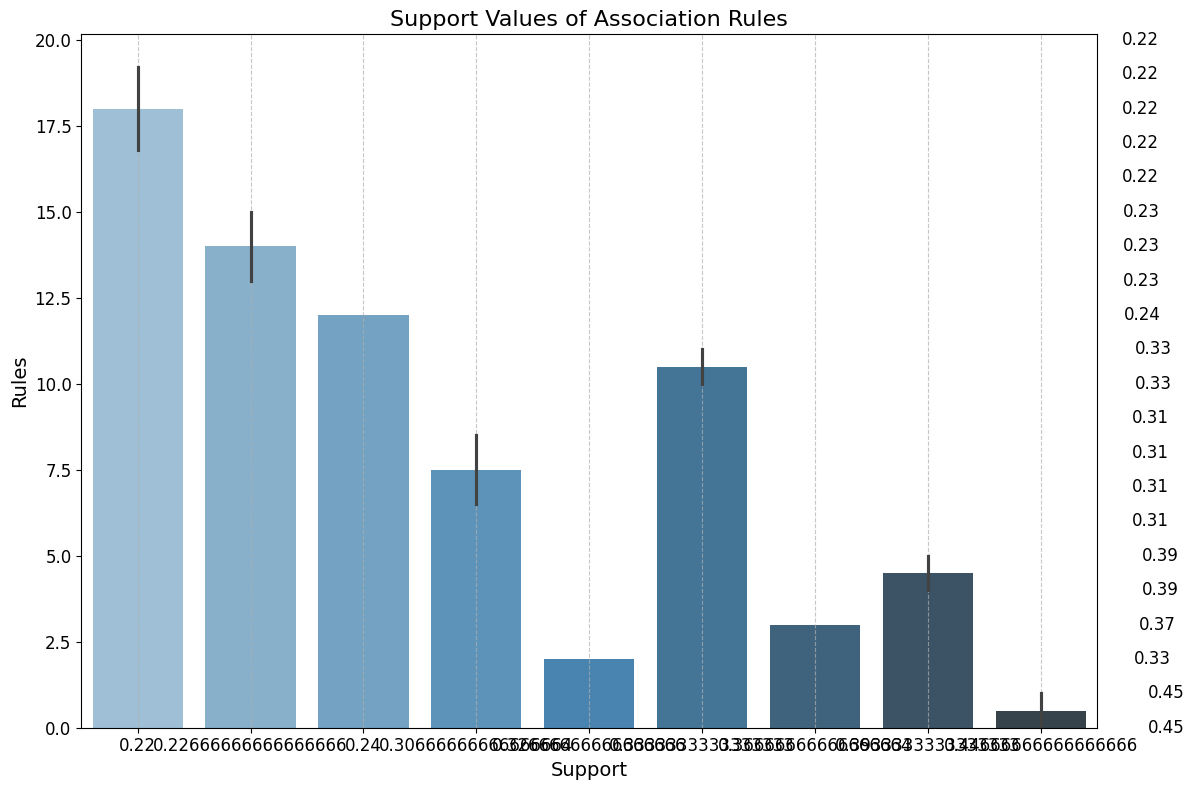

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# Menghitung itemsets yang sering muncul
frequent_itemsets = apriori(grouped_df, min_support=0.2, use_colnames=True)

# Menghitung aturan asosiasi
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Memilih kolom yang diinginkan
selected_columns = rules[['antecedents', 'consequents', 'support']]

# Mengatur ukuran grafik
plt.figure(figsize=(12, 8))

# Membuat grafik batang untuk nilai support
sns.barplot(x='support', y=selected_columns.index, data=selected_columns, palette='Blues_d')

# Menambahkan judul dan label
plt.title('Support Values of Association Rules', fontsize=16)
plt.xlabel('Support', fontsize=14)
plt.ylabel('Rules', fontsize=14)

# Menambahkan grid
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan nilai support di atas batang
for index, value in enumerate(selected_columns['support']):

    plt.text(value + 8.5, index, f'{value:.2f}', va='center', fontsize=12, ha='left')

# Menyesuaikan tampilan
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
xticks = plt.xticks()[0]  # Mendapatkan nilai ticks saat ini
plt.xticks(xticks, [f'{tick:.1f}' for tick in xticks]) # Mengatur layout agar lebih rapi

# Menampilkan grafik
plt.show()